<a href="https://colab.research.google.com/github/evolvingcodes/evolvingcodes/blob/main/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Classification**

**Importing libraries and loading data...**

In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True ,
download = True , transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train = False ,
download = True , transform = transforms.ToTensor())
training_loader = torch.utils.data.DataLoader(train_set , batch_size = 32,
shuffle = False)
test_loader = torch.utils.data.DataLoader(test_set , batch_size = 32,
shuffle = False)
torch.manual_seed(0)
# If you are using CuDNN , otherwise you can just ignore
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
dict_train_acc = {}
dict_test_acc = {}
dict_loss = {}

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



**Using Relu activation function, lr = 0.1**

Epoch 1: loss: 1118.8116747885942, train accuracy: 84.72166666666666, valid accuracy:83.56
Epoch 2: loss: 707.3027418330312, train accuracy: 87.70333333333333, valid accuracy:86.21
Epoch 3: loss: 596.0447084605694, train accuracy: 89.145, valid accuracy:87.42
Epoch 4: loss: 529.9765829853714, train accuracy: 90.16666666666667, valid accuracy:88.08
Epoch 5: loss: 480.0411928258836, train accuracy: 90.85166666666667, valid accuracy:88.67
Epoch 6: loss: 437.713832763955, train accuracy: 91.175, valid accuracy:89.01
Epoch 7: loss: 398.9058752004057, train accuracy: 91.37333333333333, valid accuracy:88.9
Epoch 8: loss: 362.68812029249966, train accuracy: 91.97666666666667, valid accuracy:89.42
Epoch 9: loss: 324.34346312098205, train accuracy: 92.13, valid accuracy:89.47
Epoch 10: loss: 291.57836676668376, train accuracy: 92.48166666666667, valid accuracy:89.73
Epoch 11: loss: 266.40057901944965, train accuracy: 92.45, valid accuracy:89.08
Epoch 12: loss: 237.7255886704661, train accuracy: 

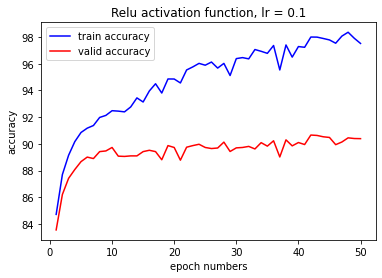

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)


  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))


dict_train_acc["Training accuracy: Relu activation function, lr = 0.1"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 0.1"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, 0.1 learning rate"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function, lr = 0.1")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**Using Tanh activation function, lr = 0.1**

Epoch 1: loss: 1035.3417087644339, train accuracy: 84.19166666666666, valid accuracy:82.84
Epoch 2: loss: 744.8632520511746, train accuracy: 86.97666666666667, valid accuracy:85.45
Epoch 3: loss: 648.7997052781284, train accuracy: 87.78166666666667, valid accuracy:86.09
Epoch 4: loss: 586.2639610171318, train accuracy: 88.69166666666666, valid accuracy:86.68
Epoch 5: loss: 533.9252194426954, train accuracy: 89.29166666666667, valid accuracy:86.96
Epoch 6: loss: 487.9893451016396, train accuracy: 89.94666666666667, valid accuracy:87.2
Epoch 7: loss: 443.57749309390783, train accuracy: 90.56333333333333, valid accuracy:87.57
Epoch 8: loss: 401.6680482812226, train accuracy: 91.29833333333333, valid accuracy:87.71
Epoch 9: loss: 360.8933498635888, train accuracy: 91.57333333333334, valid accuracy:87.69
Epoch 10: loss: 320.3324966272339, train accuracy: 91.36333333333333, valid accuracy:87.16
Epoch 11: loss: 283.250486522913, train accuracy: 92.28, valid accuracy:87.29
Epoch 12: loss: 246.

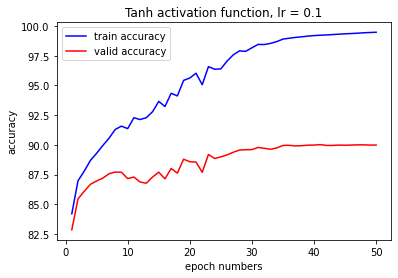

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.Tanh(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.Tanh(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.Tanh())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.Tanh())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)


  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))



dict_train_acc["Training accuracy: Tanh activation function, lr = 0.1"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Tanh activation function, lr = 0.1"] = valid_accuracy[-1]
dict_loss["Loss: Tanh activation function, lr = 0.1"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Tanh activation function, lr = 0.1")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**Using Sigmoid activation function, lr = 0.1**

Epoch 1: loss: 4339.180309057236, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4319.8178544044495, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 4318.584881067276, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: 3838.4656658768654, train accuracy: 56.24, valid accuracy:56.37
Epoch 5: loss: 1705.3296877741814, train accuracy: 71.62833333333333, valid accuracy:71.29
Epoch 6: loss: 1387.3767089545727, train accuracy: 73.66, valid accuracy:72.95
Epoch 7: loss: 1275.3375033140182, train accuracy: 75.065, valid accuracy:74.3
Epoch 8: loss: 1189.139803364873, train accuracy: 76.86, valid accuracy:75.89
Epoch 9: loss: 1107.3520093858242, train accuracy: 78.485, valid accuracy:77.7
Epoch 10: loss: 1039.2243978828192, train accuracy: 79.79166666666667, valid accuracy:78.79
Epoch 11: loss: 986.7451892197132, train accuracy: 80.74, valid accuracy:79.65
Epoch 12: loss: 945.4058426469564, train accuracy: 81.62666666666667, valid accuracy:80.55
Epoch 13: loss: 911.4230

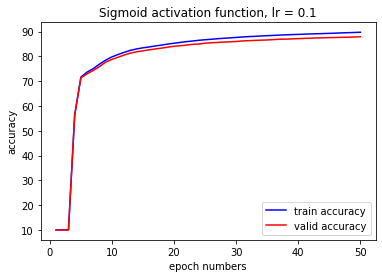

In [4]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.Sigmoid(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.Sigmoid(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.Sigmoid())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.Sigmoid())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

dict_train_acc["Training accuracy: Sigmoid activation function, lr = 0.1"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Sigmoid activation function, lr = 0.1"] = valid_accuracy[-1]
dict_loss["Loss: Sigmoid activation function, lr = 0.1"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Sigmoid activation function, lr = 0.1")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**Using ELU activation function, lr = 0.1**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ELU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ELU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ELU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ELU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))


dict_train_acc["Training accuracy: ELU activation function, lr = 0.1"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: ELU activation function, lr = 0.1"] = valid_accuracy[-1]
dict_loss["Loss: ELU activation function, lr = 0.1"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("ELU activation function, lr = 0.1")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**Investigating the effect of changing the the learning rate on ReLu**

**ReLu: lr = 0.001**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)


  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.001)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 0.001"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 0.001"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 0.001"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function, lr = 0.001")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()


**ReLu, lr = 0.5**

In [30]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)


  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.5)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 0.5"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 0.5"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 0.5"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function, lr = 0.5")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**ReLu, lr = 1**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)


  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 1"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 1"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 1"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function, lr = 1")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**ReLu, lr = 10**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)


  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=10)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 10"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 10"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 10"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function, lr = 10")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**Q2(d) Investigating the effect of different dropout values:**

**ReLu, lr = 0.1, dropouts = 0.3**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)

    self.dropout = nn.Dropout(0.3)
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.dropout(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 0.1, dropout 0.3"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 0.1, dropout 0.3"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 0.1, dropout 0.3"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function, lr = 0.1, dropout 0.3")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**ReLu, lr = 0.1, dropout = 0.1**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)

    self.dropout = nn.Dropout(0.1)
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.dropout(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 0.1, dropout 0.1"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 0.1, dropout 0.1"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 0.1, dropout 0.1"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function plot for lr = 0.1, dropout 0.")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**ReLu, lr = 0.1, dropout = 0.5**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.AvgPool2d(2, stride = 2))
    nn.init.xavier_normal_(self.cnn_model[0].weight)
    nn.init.xavier_normal_(self.cnn_model[3].weight)
    self.fc_model_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_1[0].weight)
    self.fc_model_2= nn.Sequential(nn.Linear(1024,256), nn.ReLU())
    nn.init.xavier_normal_(self.fc_model_2[0].weight)
    self.fc_model_out= nn.Sequential(nn.Linear(256, 10))
    nn.init.xavier_normal_(self.fc_model_out[0].weight)

    self.dropout = nn.Dropout(0.5)
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model_1(x)
    x = self.dropout(x)
    x = self.fc_model_2(x)
    x = self.fc_model_out(x)
    return x

device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.SGD(list(net.parameters()),lr=0.1)

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

  
dict_train_acc["Training accuracy: Relu activation function, lr = 0.1, dropout 0.5"] = train_accuracy[-1]
dict_test_acc["Testing accuracy: Relu activation function, lr = 0.1, dropout 0.5"] = valid_accuracy[-1]
dict_loss["Loss: Relu activation function, lr = 0.1, dropout 0.5"] = loss_epoch_array

epoch = [i for i in range(1, 51)]
fig, ax = plt.subplots()
ax.clear()
plt.title("Relu activation function plot for lr = 0.1, dropout 0.5")
ax.set_ylabel("accuracy")
ax.set_xlabel("epoch numbers")
plt.plot(epoch, train_accuracy, c="blue",label="train accuracy")
plt.plot(epoch, valid_accuracy, c="red", label="valid accuracy")
ax.legend()

**Saving data...**

In [ ]:
import json
with open('train_acc.json', 'w') as fp:
    json.dump(dict_train_acc, fp)
  
with open('test_acc.json', 'w') as fp:
    json.dump(dict_test_acc, fp)

with open('loss.json', 'w') as fp:
    json.dump(dict_train_acc, fp)